In [8]:
import pyedfread
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# https://cran.r-project.org/web/packages/eyelinkReader/eyelinkReader.pdf for info on the dfs created 

samples, events, messages = pyedfread.read_edf('/Users/matthewshell/Documents/20181105/181105.edf')

loadEvents = 1


Many rows of the left eye in 'samples' are stuck at a single value -- possibly because only the right eye was fully measured?

In [4]:
events['duration'] = events['end'] - events['start']

duration_stats = events['duration'].describe()
print("Duration Statistics:", duration_stats)

Duration Statistics: count    36007.000000
mean       152.634543
std        161.424418
min          0.000000
25%         36.000000
50%        120.000000
75%        227.000000
max       7177.000000
Name: duration, dtype: float64


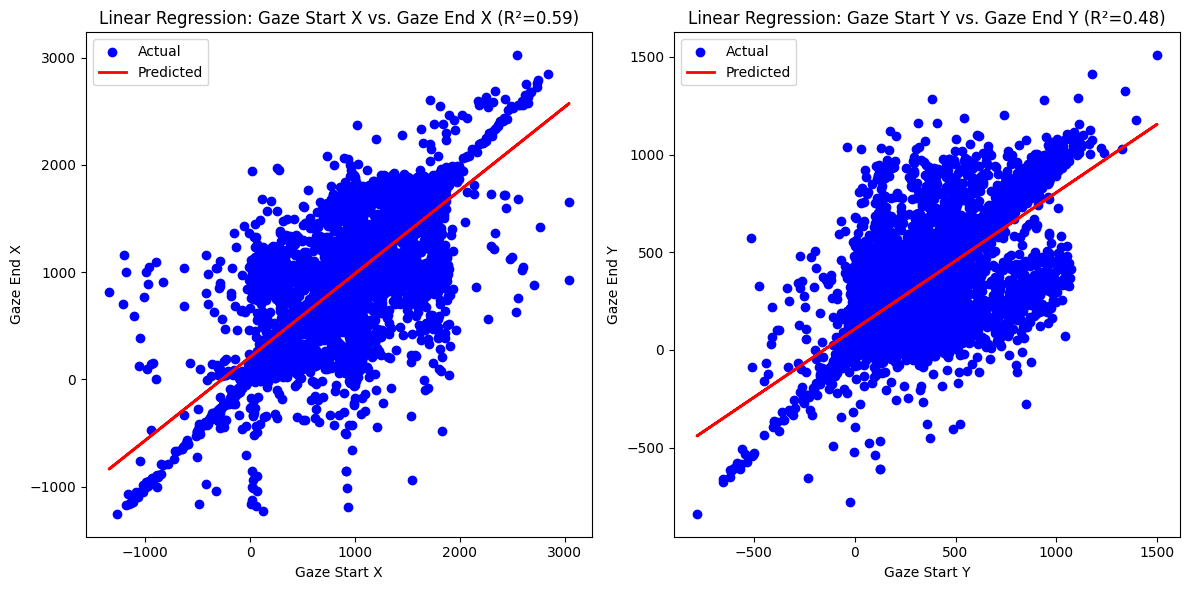

In [15]:
filtered_data = events[(events['genx'] != 0) & (events['geny'] != 0) & (events['gstx'] != 0) & (events['gsty'] != 0)]
X_gstx = filtered_data[['gstx']].values
y_genx = filtered_data['genx'].values
X_gsty = filtered_data[['gsty']].values
y_geny = filtered_data['geny'].values
X_gstx_train, X_gstx_test, y_genx_train, y_genx_test = train_test_split(X_gstx, y_genx, test_size=0.2, random_state=42)
X_gsty_train, X_gsty_test, y_geny_train, y_geny_test = train_test_split(X_gsty, y_geny, test_size=0.2, random_state=42)

model_genx = LinearRegression()
model_genx.fit(X_gstx_train, y_genx_train)

y_genx_pred = model_genx.predict(X_gstx_test)
genx_r2 = model_genx.score(X_gstx_test, y_genx_test)

model_geny = LinearRegression()
model_geny.fit(X_gsty_train, y_geny_train)

y_geny_pred = model_geny.predict(X_gsty_test)
geny_r2 = model_geny.score(X_gsty_test, y_geny_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_gstx_test, y_genx_test, color='blue', label='Actual')
plt.plot(X_gstx_test, y_genx_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Gaze Start X')
plt.ylabel('Gaze End X')
plt.title(f'Linear Regression: Gaze Start X vs. Gaze End X (R²={genx_r2:.2f})')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_gsty_test, y_geny_test, color='blue', label='Actual')
plt.plot(X_gsty_test, y_geny_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Gaze Start Y')
plt.ylabel('Gaze End Y')
plt.title(f'Linear Regression: Gaze Start Y vs. Gaze End Y (R²={geny_r2:.2f})')
plt.legend()

plt.tight_layout()
plt.show()


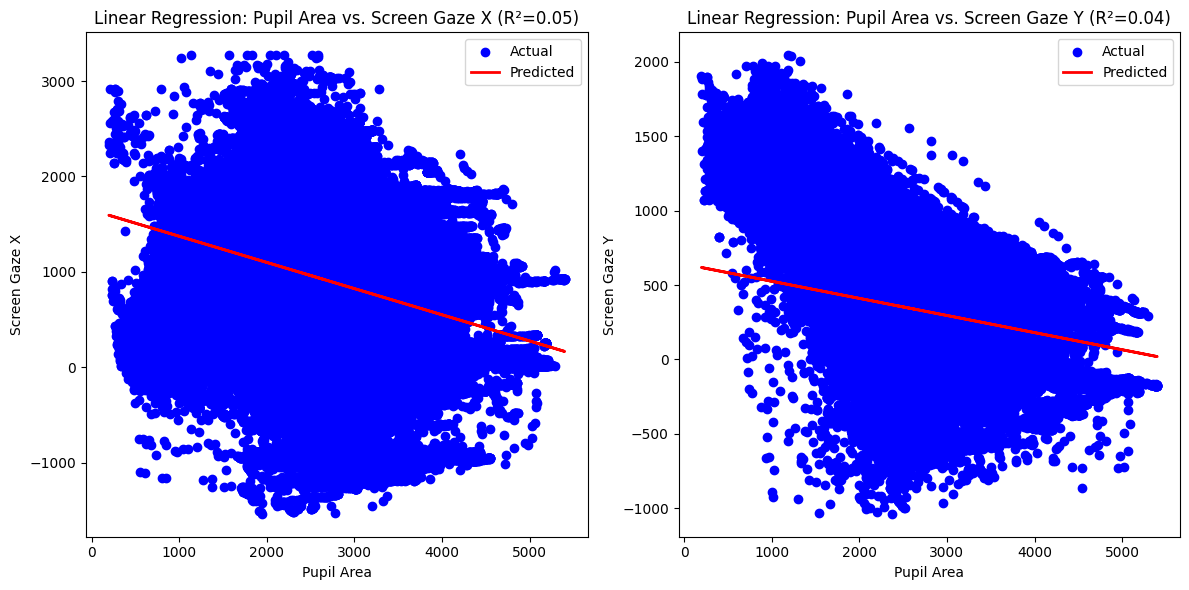

In [21]:
filtered_data_pupil = samples[(samples['gx_left'] != 0) & (samples['pa_left'] != 0) & (samples['gy_left'] != 0)]
X_pa = filtered_data_pupil[['pa_left']].values
y_gx_left = filtered_data_pupil['gx_left'].values
y_gy_left = filtered_data_pupil['gy_left'].values

X_pa_train1, X_pa_test1, y_gx_left_train, y_gx_left_test = train_test_split(X_pa, y_gx_left, test_size=0.2, random_state=42)
X_pa_train2, X_pa_test2, y_gy_left_train, y_gy_left_test = train_test_split(X_pa, y_gy_left, test_size=0.2, random_state=42)

model_pax = LinearRegression()
model_pax.fit(X_pa_train1, y_gx_left_train)
y_pax_pred = model_pax.predict(X_pa_test1)
pax_r2 = model_pax.score(X_pa_test1, y_gx_left_test)

model_pay = LinearRegression()
model_pay.fit(X_pa_train2, y_gy_left_train)
y_pay_pred = model_pay.predict(X_pa_test2)
pay_r2 = model_pay.score(X_pa_test2, y_gy_left_test)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pa_test1, y_gx_left_test, color='blue', label='Actual')
plt.plot(X_pa_test1, y_pax_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Pupil Area')
plt.ylabel('Screen Gaze X')
plt.title(f'Linear Regression: Pupil Area vs. Screen Gaze X (R²={pax_r2:.2f})')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_pa_test2, y_gy_left_test, color='blue', label='Actual')
plt.plot(X_pa_test2, y_pay_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Pupil Area')
plt.ylabel('Screen Gaze Y')
plt.title(f'Linear Regression: Pupil Area vs. Screen Gaze Y (R²={pay_r2:.2f})')
plt.legend()

plt.tight_layout()
plt.show()